In [1]:
import pandas as pd 
import numpy as np

In [2]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [3]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

In [178]:
from sklearn.model_selection import train_test_split
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, accuracy_score
from matplotlib import pyplot as plt
from sklearn.metrics import plot_precision_recall_curve
from sklearn.model_selection import GridSearchCV

In [6]:
data = pd.read_json('train.json', lines=True)

In [7]:
data

,context,question,answer,pairID
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,да,571247699fe0b04318e283fb82bac5bd
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",нет,7abba7d0ebdd11d6ccaed554ebd1900a
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,да,a926a713418b6078db042e33bf1eea29
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",нет,ab409ce3b0e248506bc164ec47d151e3
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",да,3bee65e5934a3a7bcad46067ab900029
...,...,...,...,...
1303,Активное вещество Кондилина — подофиллотоксин ...,Подофиллотоксин является веществом синтетическ...,нет,d5f5f62ecf49f9a0c8c8b132865b601f
1304,Опоясывающий лишай (опоясывающий герпес) — ост...,В организме вирус сохраняется в узлах тройничн...,да,d913dd3bf7425919ecf6ee4f60b59218
1305,"Листерии — короткие грамположительные палочки,...",Эта инфекция попадает в организм человека чере...,нет,d761bf616b3c73ee968192fe9099daea
1306,Диагноз биполярного аффективного расстройства ...,Биполярное расстройство относится к рецидивиру...,да,6a868ee8ae15e107a29eaa0733fea60a


In [8]:
data['answer'].value_counts()

да     654
нет    654
Name: answer, dtype: int64

In [9]:
print(data['context'][0])
print()
print(data['question'][0])
print()
print(data['answer'][0])

Способность к адаптации сенсорной системы к постоянной силе длительно действующего раздражителя заключается в основном в понижении абсолютной и повышении дифференциальной чувствительности. Это свойство присуще всем отделам анализатора, но наиболее ярко оно проявляется на уровне рецепторов и заключается в изменении не только их возбудимости и импульсации, но и показателей функциональной мобильности, т.е. способности к изменению числа функционирующих рецепторных структур (П.Г.Снякин).

Является ли сниженние абсолютной чувствительности рецепторов одним из основных способов адаптации сенсорной системы?

да


In [10]:
print(data['context'][1])
print()
print(data['question'][1])
print()
print(data['answer'][1])

Обеспечение возможности познания внешнего мира. Внешние анализаторы — это многоканальная система связи с внешним миром, поскольку организм имеет не один анализатор, а несколько. С помощью анализаторов организм познает свойства предметов и явлений окружающей среды, полезные и негативные стороны его воздействия. Поэтому нарушения функции внешних анализаторов, особенно зрительного и слухового, чрезвычайно сильно затрудняют познание внешнего мира (очень беден окружающий мир для слепого или глухого).

Бывет ли, что люди со выраженным нарушением зрительной и слуховой функции не испытавают значительных нарушений в познании внешнего мира?

нет


In [11]:
data['answer_bin'] = [1 if x == 'да' else 0 for x in data['answer']]

In [12]:
data_droped = data.drop(['answer', 'pairID'], axis=1)

In [13]:
data_droped

,context,question,answer_bin
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,1
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",0
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,1
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",0
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",1
...,...,...,...
1303,Активное вещество Кондилина — подофиллотоксин ...,Подофиллотоксин является веществом синтетическ...,0
1304,Опоясывающий лишай (опоясывающий герпес) — ост...,В организме вирус сохраняется в узлах тройничн...,1
1305,"Листерии — короткие грамположительные палочки,...",Эта инфекция попадает в организм человека чере...,0
1306,Диагноз биполярного аффективного расстройства ...,Биполярное расстройство относится к рецидивиру...,1


In [14]:
data_fuzz = data_droped.copy()

In [15]:
WRatio = []
token_sort_ratio = []
partial_ratio = []

for i in range(len(data_fuzz)):
    WRatio.append(fuzz.WRatio(data_fuzz['context'][i], data_fuzz['question'][i]))
    token_sort_ratio.append(fuzz.token_sort_ratio(data_fuzz['context'][i], data_fuzz['question'][i]))
    partial_ratio.append(fuzz.partial_ratio(data_fuzz['context'][i], data_fuzz['question'][i]))

In [16]:
data_fuzz['WRatio'] = WRatio
data_fuzz['token_sort_ratio'] = token_sort_ratio
data_fuzz['partial_ratio'] = partial_ratio

In [231]:
sns.scatterplot(data=data_fuzz, x="WRatio", y=count, hue="answer_bin")

NameError: name 'count' is not defined

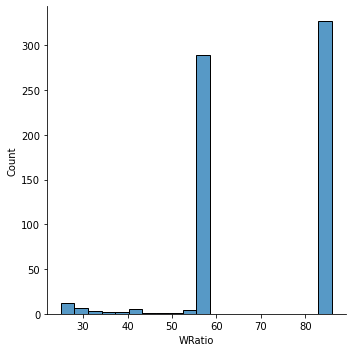

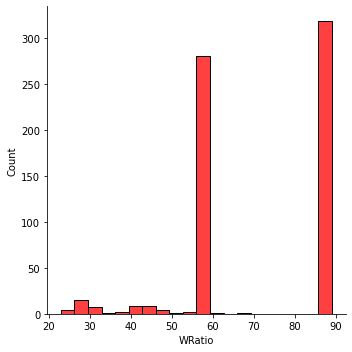

In [234]:
data = data_fuzz[data_fuzz['answer_bin'] > 0]['WRatio']

sns.displot(data, bins = 20)

plt.show()

data = data_fuzz[data_fuzz['answer_bin'] == 0]['WRatio']

sns.displot(data, bins = 20, color="red")

plt.show()

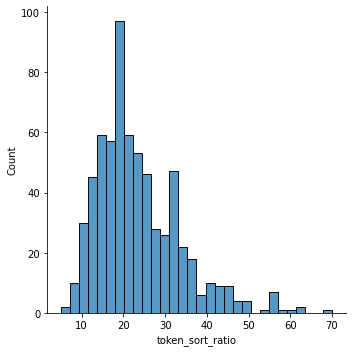

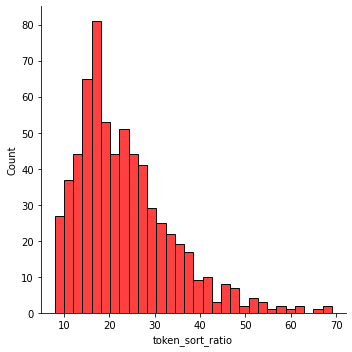

In [18]:
data = data_fuzz[data_fuzz['answer_bin'] > 0]['token_sort_ratio']

sns.displot(data, bins = 30)

plt.show()

data = data_fuzz[data_fuzz['answer_bin'] == 0]['token_sort_ratio']

sns.displot(data, bins = 30, color="red")

plt.show()

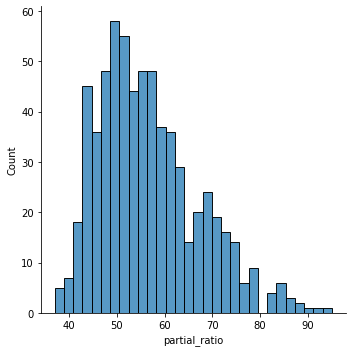

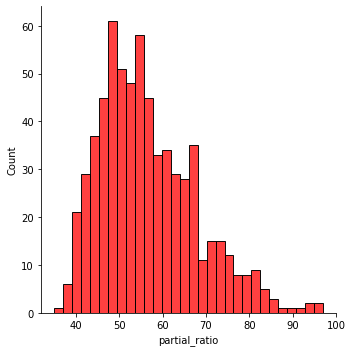

In [19]:
data = data_fuzz[data_fuzz['answer_bin'] > 0]['partial_ratio']

sns.displot(data, bins = 30)

plt.show()

data = data_fuzz[data_fuzz['answer_bin'] == 0]['partial_ratio']

sns.displot(data, bins = 30, color="red")

plt.show()

In [20]:
data_fuzz.head()

,context,question,answer_bin,WRatio,token_sort_ratio,partial_ratio
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,1,86,35,49
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",0,86,33,53
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,1,86,56,46
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",0,86,52,54
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",1,86,48,57


In [21]:
# TF IDF

In [22]:
corpus = []
corpus_text = ''
for i in range(len(data_fuzz)):
    corpus.append(data_fuzz['context'][i])
    corpus.append(data_fuzz['question'][i])
    corpus_text += data_fuzz['question'][i] + data_fuzz['context'][i]

In [23]:
# tfidfVec = TfidfVectorizer()
# tfidf = tfidfVec.fit_transform(corpus)

In [24]:
# print("\ n Слововая матрица частоты (TF-IDF):")
# print(tfidf)
# print("\ n модель фраз (TF-IDF):")
# print(tfidf.toarray())

In [25]:
from nlp_rake import Rake
import nltk
from nltk.corpus import stopwords
stops = list(set(stopwords.words("russian")))

In [26]:
rake = Rake(stopwords = stops, max_words = 3)

In [27]:
rake.apply(corpus_text) [:10]

[('вы-явление тератогенных свойств', 9.0),
 ('обмундирования стойкими бов', 9.0),
 ('сих пор судят', 9.0),
 ('главное связующее звено', 9.0),
 ('шеррингтона называют ноцицепторами', 9.0),
 ('враженной гиперпродукцией церуллоплазмина', 9.0),
 ('нашла своего объяснения', 9.0),
 ('методики открытых катетеров', 9.0),
 ('купированный медикаментозно пропафенон', 9.0),
 ('глубинные внутриличностные конфликты', 9.0)]

In [28]:
rake.apply(data_fuzz['context'][0]) [:10]

[('адаптации сенсорной системы', 9.0),
 ('повышении дифференциальной чувствительности', 9.0),
 ('показателей функциональной мобильности', 9.0),
 ('понижении абсолютной', 4.0),
 ('уровне рецепторов', 4.0),
 ('способность', 1.0),
 ('основном', 1.0),
 ('заключается', 1.0),
 ('изменении', 1.0),
 ('возбудимости', 1.0)]

In [29]:
data_fuzz['question'][0]

'Является ли сниженние абсолютной чувствительности рецепторов одним из основных способов адаптации сенсорной системы?'

In [30]:
rake.apply(data_fuzz['question'][0])

[('является', 1.0)]

In [31]:
from summa import keywords

In [32]:
import yake

extractor = yake.KeywordExtractor (

    lan = "ru",     # язык
    n = 1,          # максимальное количество слов в фразе
    dedupLim = 0.3, # порог похожести слов
    top = 5        # количество ключевых слов
)

In [33]:
arr = extractor.extract_keywords(corpus_text)
arr

[('действие', 0.0003317203755412491),
 ('Является', 0.0003590981105044654),
 ('крови', 0.0004638343317750434),
 ('оказывает', 0.0005000175568746666),
 ('препарат', 0.0008425406106736422)]

In [34]:
word = extractor.extract_keywords(data_fuzz['context'][0])
word

[('Способность', 0.0987659101264725),
 ('заключается', 0.1023350691964954),
 ('адаптации', 0.13629973302207535),
 ('системы', 0.13629973302207535),
 ('длительно', 0.13629973302207535)]

In [35]:
type(arr[0][1])

numpy.float64

In [36]:
arr.sort(key = lambda x: x[1], reverse=True)

In [37]:
arr

[('препарат', 0.0008425406106736422),
 ('оказывает', 0.0005000175568746666),
 ('крови', 0.0004638343317750434),
 ('Является', 0.0003590981105044654),
 ('действие', 0.0003317203755412491)]

## Text preprocessing

In [38]:
data_fuzz.head()

,context,question,answer_bin,WRatio,token_sort_ratio,partial_ratio
0,Способность к адаптации сенсорной системы к по...,Является ли сниженние абсолютной чувствительно...,1,86,35,49
1,Обеспечение возможности познания внешнего мира...,"Бывет ли, что люди со выраженным нарушением зр...",0,86,33,53
2,Ощущение положения тела в пространстве связано...,Двигательный анализатор вносит значительный вк...,1,86,56,46
3,Нуждаемость в санитарной обработке не определя...,"Сильные кислоты нельзя отнести к ""агрессивным""...",0,86,52,54
4,"Ведущим фактором лучевого поражения организма,...","Могут ли клетки, сохранившие жизнеспособность,...",1,86,48,57


In [39]:
data_merged = data_fuzz.copy()

In [40]:
context_question = []
for i in range(len(data_merged)):
    context_question.append(
    data_merged['context'][i] + data_merged['question'][i])

In [41]:
data_merged['context_question'] = context_question
data_merged = data_merged.drop(['context', 'question'], axis=1)

In [42]:
data_merged.head()

,answer_bin,WRatio,token_sort_ratio,partial_ratio,context_question
0,1,86,35,49,Способность к адаптации сенсорной системы к по...
1,0,86,33,53,Обеспечение возможности познания внешнего мира...
2,1,86,56,46,Ощущение положения тела в пространстве связано...
3,0,86,52,54,Нуждаемость в санитарной обработке не определя...
4,1,86,48,57,"Ведущим фактором лучевого поражения организма,..."


In [181]:
russian_stop_words = stopwords.words("russian")

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language="russian")
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

In [182]:
vectorizer = TfidfVectorizer(tokenizer=lambda x: tokenize_sentence(x, remove_stop_words=True))

## Feature preprocessing

In [183]:
X = pd.DataFrame.sparse.from_spmatrix(
    vectorizer.fit_transform(data_merged["context_question"])
)

In [69]:
# X['WRatio'] = preprocessing.normalize(data_merged['WRatio'])

In [70]:
# preprocessing.normalize(np.array(data_merged['WRatio']))

In [71]:
scaler = MinMaxScaler()

In [72]:
data_normalized = data_merged[['WRatio', 'token_sort_ratio', 'partial_ratio']]

In [73]:
data_normalized = pd.DataFrame(scaler.fit_transform(data_normalized),
            columns=data_normalized.columns, index=data_normalized.index) 

In [74]:
data_normalized

,WRatio,token_sort_ratio,partial_ratio
0,0.954545,0.461538,0.225806
1,0.954545,0.430769,0.290323
2,0.954545,0.784615,0.177419
3,0.954545,0.723077,0.306452
4,0.954545,0.661538,0.354839
...,...,...,...
1303,0.954545,0.476923,0.419355
1304,0.515152,0.153846,0.322581
1305,0.515152,0.153846,0.112903
1306,0.136364,0.123077,0.274194


In [75]:
X = pd.concat([X, data_normalized], axis=1)

In [180]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11030,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.461538,0.225806
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.430769,0.290323
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.784615,0.177419
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.723077,0.306452
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.176428,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.661538,0.354839


In [77]:
Y = data_merged['answer_bin']

In [78]:
print(X.shape)
print(Y.shape)

(1308, 11040)
(1308,)


In [79]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,11030,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.461538,0.225806
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.430769,0.290323
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.784615,0.177419
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.723077,0.306452
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.176428,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.661538,0.354839


In [80]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: answer_bin, dtype: int64

In [81]:
df_train = pd.concat([X, Y], axis=1)

In [82]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio,answer_bin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.461538,0.225806,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.430769,0.290323,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.784615,0.177419,1
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.723077,0.306452,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.661538,0.354839,1


## Test data preparation

In [200]:
data_test = pd.read_json('dev.json', lines=True)

In [201]:
data_test.head()

,context,question,answer,pairID
0,"Противокашлевое неопиоидное средство, обладает...",Противокашлевое действие бутамирата цитрата об...,да,53f9b303802507807bc96f95ba2a5230
1,"Нимесулид относится к НПВС, механизм действия ...",Нимесулид активно ингибирует ЦОГ-1?,нет,5f93320e5d51bf7afbcac23b8fe851ac
2,"Комбинированный препарат, фармакологическая ак...",Гвайфенезин - это вещество с противотревожным ...,да,711bcf04e62c0a722f8b72030cd1f165
3,In vitro: ингибирует пролиферацию остеобластов...,Золедроновая кислота не влияет на образование ...,нет,de4416b7f44436c5816e3ec2f6dee436
4,"Препарат производится из пулированной плазмы, ...",Распределение подклассов иммуноглобулина G в э...,да,fa56509c3fc8c6e5fa2a96c5754313b3


In [202]:
# data_test['answer_bin'] = [1 if x == 'да' else 0 for x in data_test['answer']]

In [203]:
Y_test = pd.DataFrame()
Y_test['answer_bin'] = [1 if x == 'да' else 0 for x in data_test['answer']]

In [204]:
data_test = data_test.drop(['pairID', 'answer'], axis=1)

In [205]:
test_fuzz = data_test.copy()

In [206]:
WRatio = []
token_sort_ratio = []
partial_ratio = []

for i in range(len(test_fuzz)):
    WRatio.append(fuzz.WRatio(test_fuzz['context'][i], test_fuzz['question'][i]))
    token_sort_ratio.append(fuzz.token_sort_ratio(test_fuzz['context'][i], test_fuzz['question'][i]))
    partial_ratio.append(fuzz.partial_ratio(test_fuzz['context'][i], test_fuzz['question'][i]))

In [207]:
test_fuzz['WRatio'] = WRatio
test_fuzz['token_sort_ratio'] = token_sort_ratio
test_fuzz['partial_ratio'] = partial_ratio

In [208]:
test_fuzz.head()

,context,question,WRatio,token_sort_ratio,partial_ratio
0,"Противокашлевое неопиоидное средство, обладает...",Противокашлевое действие бутамирата цитрата об...,86,36,50
1,"Нимесулид относится к НПВС, механизм действия ...",Нимесулид активно ингибирует ЦОГ-1?,57,14,57
2,"Комбинированный препарат, фармакологическая ак...",Гвайфенезин - это вещество с противотревожным ...,86,29,60
3,In vitro: ингибирует пролиферацию остеобластов...,Золедроновая кислота не влияет на образование ...,57,14,57
4,"Препарат производится из пулированной плазмы, ...",Распределение подклассов иммуноглобулина G в э...,86,41,59


In [209]:
test_normalized = test_fuzz[['WRatio', 'token_sort_ratio', 'partial_ratio']]

In [210]:
test_normalized = pd.DataFrame(scaler.fit_transform(test_normalized),
            columns=test_normalized.columns, index=test_normalized.index) 

In [211]:
test_normalized.head()

,WRatio,token_sort_ratio,partial_ratio
0,1.0,0.468750,0.214286
1,0.5,0.125000,0.339286
2,1.0,0.359375,0.392857
3,0.5,0.125000,0.339286
4,1.0,0.546875,0.375000


In [212]:
test_merged = data_test.copy()

In [213]:
context_question = []
for i in range(len(test_merged)):
    context_question.append(
    test_merged['context'][i] + test_merged['question'][i])
test_merged['context_question'] = context_question
test_merged = test_merged.drop(['context', 'question'], axis=1)
test_merged.head()

,context_question
0,"Противокашлевое неопиоидное средство, обладает..."
1,"Нимесулид относится к НПВС, механизм действия ..."
2,"Комбинированный препарат, фармакологическая ак..."
3,In vitro: ингибирует пролиферацию остеобластов...
4,"Препарат производится из пулированной плазмы, ..."


In [214]:
X_test = pd.DataFrame.sparse.from_spmatrix(
    vectorizer.transform(test_merged["context_question"])
)

In [215]:
X_test = pd.concat([X_test, test_normalized], axis=1)

In [216]:
X_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11030,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.468750,0.214286
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.125000,0.339286
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.359375,0.392857
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.125000,0.339286
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.546875,0.375000


In [217]:
df_test = pd.concat([X_test, Y_test], axis=1)

In [218]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio,answer_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.468750,0.214286,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.125000,0.339286,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.359375,0.392857,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.125000,0.339286,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.546875,0.375000,1


## Modeling

In [191]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio,answer_bin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.461538,0.225806,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.430769,0.290323,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.784615,0.177419,1
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.723077,0.306452,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.954545,0.661538,0.354839,1


In [192]:
X_train = df_train.copy()
X_train = X_train.drop(['answer_bin'], axis=1)

In [193]:
Y_train = df_train['answer_bin']

In [219]:
df_test.head()

,0,1,2,3,4,5,6,7,8,9,...,11031,11032,11033,11034,11035,11036,WRatio,token_sort_ratio,partial_ratio,answer_bin
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.468750,0.214286,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.125000,0.339286,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.359375,0.392857,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.125000,0.339286,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.546875,0.375000,1


In [195]:
model = LogisticRegression(random_state=0)

In [196]:
model.fit(X_train, Y_train)

C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(random_state=0)

In [197]:
model.predict(X_test)

C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


array([0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [220]:
accuracy_score(y_true=df_test['answer_bin'], y_pred=model.predict(X_test))

C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.53515625

## Try without extra features

In [221]:
df_train_t = df_train.copy()
df_train_t = df_train_t.drop(['WRatio', 'token_sort_ratio', 'partial_ratio'], axis=1)

In [222]:
df_train_t.head()

,0,1,2,3,4,5,6,7,8,9,...,11028,11029,11030,11031,11032,11033,11034,11035,11036,answer_bin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02873,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.176428,0.176428,0.0,0.0,0.0,0.0,0.0,0.0,1


In [226]:
X_train_t = df_train_t.drop(['answer_bin'], axis=1)
y_train_t = df_train_t['answer_bin']

In [223]:
df_test_t = df_test.copy()
df_test_t = df_test.drop(['WRatio', 'token_sort_ratio', 'partial_ratio'], axis=1)

In [224]:
df_train_t.head()

,0,1,2,3,4,5,6,7,8,9,...,11028,11029,11030,11031,11032,11033,11034,11035,11036,answer_bin
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.02873,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.226588,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.00000,0.176428,0.176428,0.0,0.0,0.0,0.0,0.0,0.0,1


In [227]:
X_test_t = df_test_t.drop(['answer_bin'], axis=1)
y_test_t = df_test_t['answer_bin']

In [225]:
clf = LogisticRegression(random_state=0)

In [228]:
clf.fit(X_train_t, y_train_t)

LogisticRegression(random_state=0)

In [229]:
accuracy_score(y_true=y_test_t, y_pred=clf.predict(X_test_t))

0.5390625

## Check feature importance

In [251]:
importance = model.coef_

In [258]:
importance = importance[0][-3:]

In [259]:
importance

array([ 0.32308231, -0.33266454,  0.02260711])

In [260]:
# partial ratio is almost useless

## Modeling without partial ratio

In [267]:
df_train_t = df_train.copy()
df_train_t = df_train_t.drop(['partial_ratio'], axis=1)
X_train_t = df_train_t.drop(['answer_bin'], axis=1)
y_train_t = df_train_t['answer_bin']

In [268]:
df_test_t = df_test.copy()
df_test_t = df_test.drop(['partial_ratio'], axis=1)
X_test_t = df_test_t.drop(['answer_bin'], axis=1)
y_test_t = df_test_t['answer_bin']

In [269]:
clf = LogisticRegression(random_state=0)
clf.fit(X_train_t, y_train_t)

C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


LogisticRegression(random_state=0)

In [270]:
accuracy_score(y_true=y_test_t, y_pred=clf.predict(X_test_t))

C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:1858: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\foa1s\anaconda3\lib\site-packages\sklearn\utils\validation.py:758: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


0.53125